In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

glass = pd.read_csv('glass.csv')
glass.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

In [45]:
glass.Type.value_counts().sort_index()

Type
1    70
2    76
3    17
5    13
6     9
7    29
Name: count, dtype: int64

In [46]:
glass['household'] = glass.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.household.value_counts()

household
0    163
1     51
Name: count, dtype: int64

In [47]:
glass.sort_values( by = 'Al', inplace=True)
X= np.array(glass.Al).reshape(-1,1)
y = glass.household

In [48]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X,y)
pred = logreg.predict(X)
logreg.coef_, logreg.intercept_

(array([[3.11517927]]), array([-6.00934605]))

Text(0, 0.5, 'household')

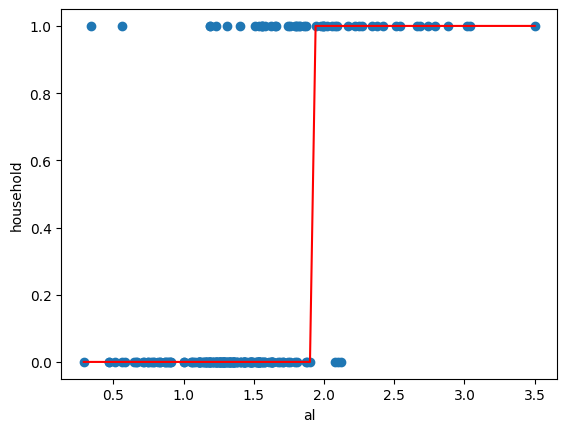

In [49]:
glass.sort_values( by = 'Al', inplace=True)
# Plot the class predictions.

plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [50]:
logreg.predict_proba(X)[:15]

array([[0.9939759 , 0.0060241 ],
       [0.99296771, 0.00703229],
       [0.98949363, 0.01050637],
       [0.98949363, 0.01050637],
       [0.98811597, 0.01188403],
       [0.98614074, 0.01385926],
       [0.98614074, 0.01385926],
       [0.98526292, 0.01473708],
       [0.9817376 , 0.0182624 ],
       [0.98117062, 0.01882938],
       [0.98058638, 0.01941362],
       [0.97806663, 0.02193337],
       [0.97738831, 0.02261169],
       [0.9752281 , 0.0247719 ],
       [0.9752281 , 0.0247719 ]])

In [51]:
# Store the predicted probabilities of class 1.
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

Text(0, 0.5, 'household')

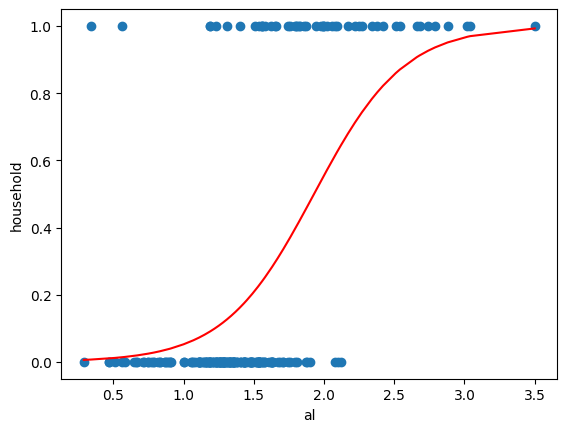

In [52]:
# Plot the predicted probabilities.
plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [53]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_true=y, y_pred=pred)
cm

array([[160,   3],
       [ 25,  26]], dtype=int64)

In [54]:
Accuracy = (cm[0,0]+ cm[1,1])/ (np.sum(cm))
Accuracy

0.8691588785046729

In [55]:
Precision = (cm[1,1])/ (np.sum(cm[: , 1]))
Precision

0.896551724137931

In [56]:
Recall = (cm[1,1])/ (np.sum(cm[1,:]))
Recall

0.5098039215686274

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy_score(y_true=y, y_pred=pred)

0.8691588785046729

In [58]:
precision_score(y_true=y, y_pred=pred)

0.896551724137931

In [59]:
recall_score(y,pred)

0.5098039215686274

In [60]:
def evaluate_threshold(threshold):
    glass['household_pred'] = (glass.household_pred_prob >= threshold).astype(int)
    
    cm = metrics.confusion_matrix(y_true=y, y_pred=glass['household_pred'])
    accuracy = (cm[0, 0] + cm[1, 1]) / np.sum(cm)
    precision = cm[1, 1] / np.sum(cm[:, 1])
    recall = cm[1, 1] / np.sum(cm[1, :])
    
    return accuracy, precision, recall

# Try different thresholds
thresholds = [0.2, 0.4, 0.6, 0.8]

for threshold in thresholds:
    acc, prec, rec = evaluate_threshold(threshold)
    print(f'Threshold: {threshold}, Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}')

Threshold: 0.2, Accuracy: 0.7710, Precision: 0.5116, Recall: 0.8627
Threshold: 0.4, Accuracy: 0.8785, Precision: 0.8205, Recall: 0.6275
Threshold: 0.6, Accuracy: 0.8411, Precision: 0.8696, Recall: 0.3922
Threshold: 0.8, Accuracy: 0.8178, Precision: 1.0000, Recall: 0.2353


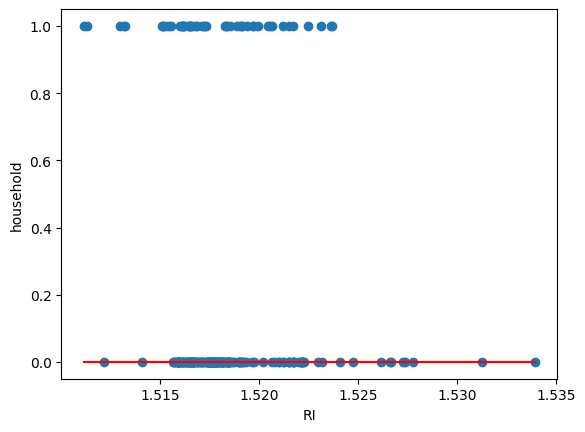


Analysis for column 'RI':
Confusion Matrix:
[[163   0]
 [ 51   0]]
Accuracy: 0.76
Precision: 0.00
Recall: 0.00



C:\Users\28034\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


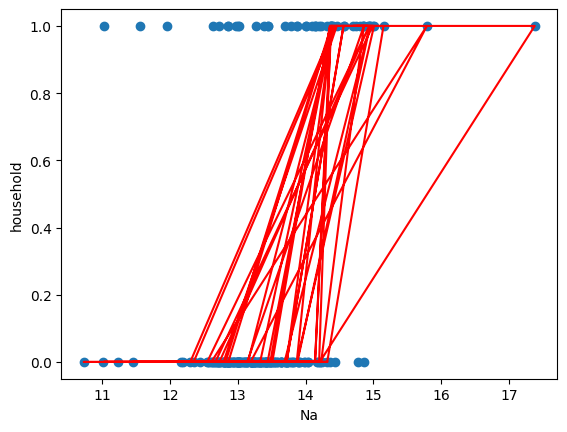


Analysis for column 'Na':
Confusion Matrix:
[[159   4]
 [ 27  24]]
Accuracy: 0.86
Precision: 0.86
Recall: 0.47



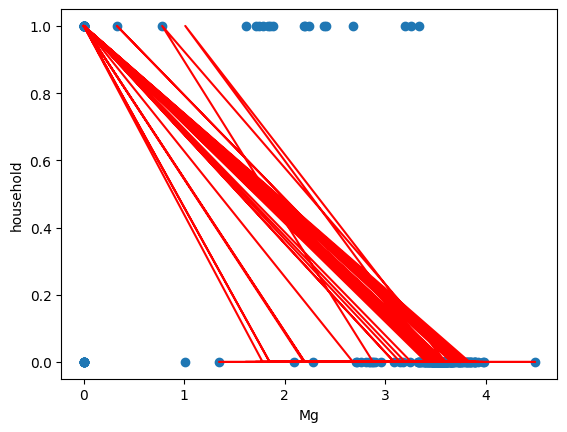


Analysis for column 'Mg':
Confusion Matrix:
[[153  10]
 [ 16  35]]
Accuracy: 0.88
Precision: 0.78
Recall: 0.69



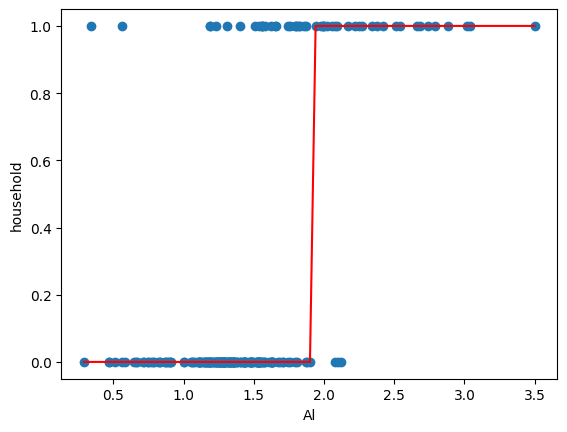


Analysis for column 'Al':
Confusion Matrix:
[[160   3]
 [ 25  26]]
Accuracy: 0.87
Precision: 0.90
Recall: 0.51



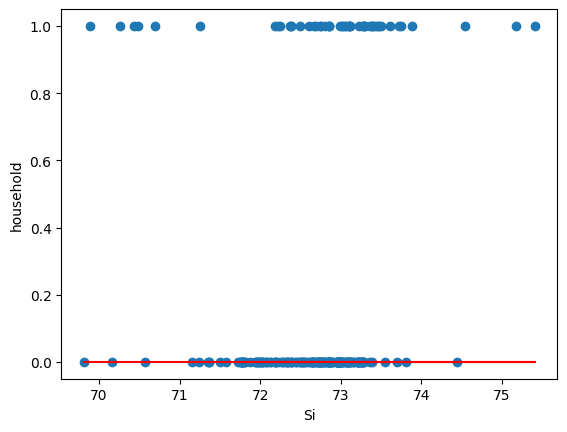


Analysis for column 'Si':
Confusion Matrix:
[[163   0]
 [ 51   0]]
Accuracy: 0.76
Precision: 0.00
Recall: 0.00



C:\Users\28034\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


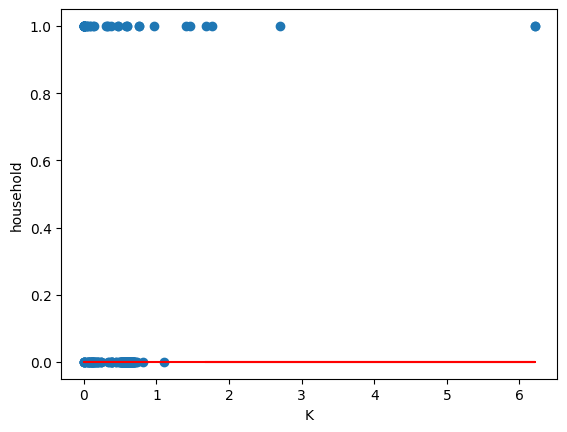


Analysis for column 'K':
Confusion Matrix:
[[163   0]
 [ 51   0]]
Accuracy: 0.76
Precision: 0.00
Recall: 0.00



C:\Users\28034\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


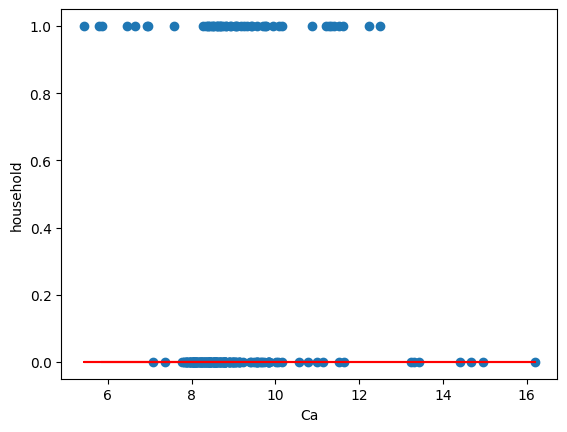

C:\Users\28034\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Analysis for column 'Ca':
Confusion Matrix:
[[163   0]
 [ 51   0]]
Accuracy: 0.76
Precision: 0.00
Recall: 0.00



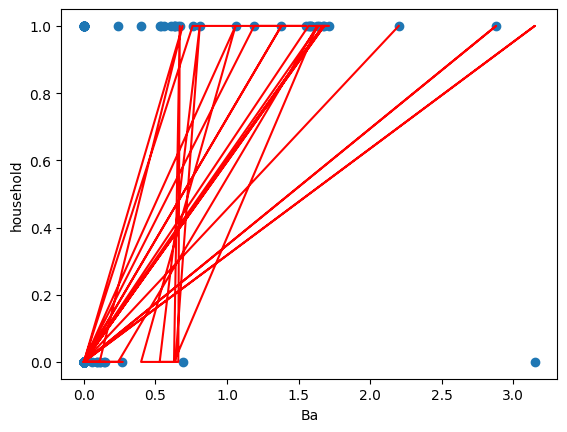


Analysis for column 'Ba':
Confusion Matrix:
[[161   2]
 [ 33  18]]
Accuracy: 0.84
Precision: 0.90
Recall: 0.35



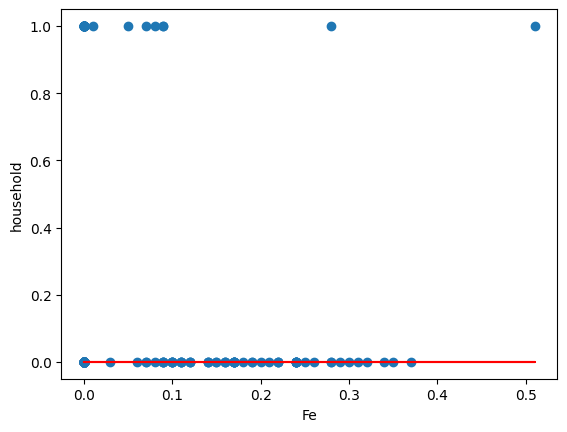


Analysis for column 'Fe':
Confusion Matrix:
[[163   0]
 [ 51   0]]
Accuracy: 0.76
Precision: 0.00
Recall: 0.00



C:\Users\28034\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


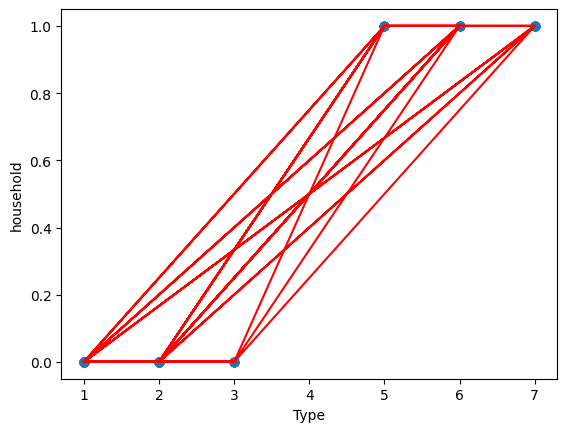


Analysis for column 'Type':
Confusion Matrix:
[[163   0]
 [  0  51]]
Accuracy: 1.00
Precision: 1.00
Recall: 1.00



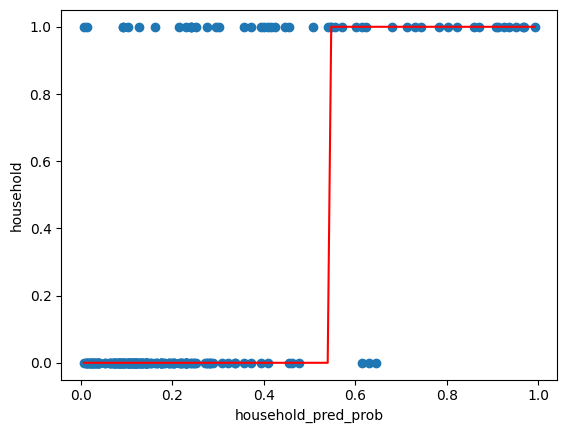


Analysis for column 'household_pred_prob':
Confusion Matrix:
[[160   3]
 [ 27  24]]
Accuracy: 0.86
Precision: 0.89
Recall: 0.47



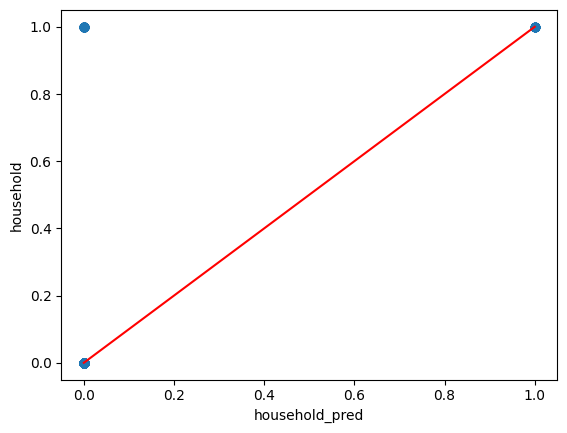


Analysis for column 'household_pred':
Confusion Matrix:
[[163   0]
 [ 39  12]]
Accuracy: 0.82
Precision: 1.00
Recall: 0.24



In [61]:
# Assuming 'household' is the target column
target_column = 'household'

# Drop the target column from features
features = glass.drop(columns=[target_column])

# Loop through each column for analysis
for column in features.columns:
    X = np.array(glass[column]).reshape(-1, 1)
    y = glass[target_column]

    logreg = LogisticRegression()
    logreg.fit(X, y)
    pred = logreg.predict(X)

    # Plot the class predictions
    plt.scatter(glass[column], glass[target_column])
    plt.plot(glass[column], pred, color='red')
    plt.xlabel(column)
    plt.ylabel(target_column)
    plt.show()

    # Evaluate the model
    cm = metrics.confusion_matrix(y_true=y, y_pred=pred)
    accuracy = accuracy_score(y_true=y, y_pred=pred)
    precision = precision_score(y_true=y, y_pred=pred)
    recall = recall_score(y_true=y, y_pred=pred)

    print(f"\nAnalysis for column '{column}':")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}\n")

In [62]:
# Drop the 'household' and 'household_pred_prob' columns for now
glass = glass.drop(['household', 'household_pred_prob'], axis=1)

# Separate features (X) and target variable (y)
X = glass.drop('Type', axis=1)
y = glass['Type']

# Perform one-hot encoding for categorical variables if needed
# For example, if you have categorical columns like 'Color', you can use pd.get_dummies

# Normalize the features to ensure they are on a similar scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Now, fit a logistic regression model on all features
logreg_all_features = LogisticRegression()
logreg_all_features.fit(X_normalized, y)

# Make predictions
pred_all_features = logreg_all_features.predict(X_normalized)

# Evaluate the model
accuracy_all_features = accuracy_score(y_true=y, y_pred=pred_all_features)
precision_all_features = precision_score(y_true=y, y_pred=pred_all_features, average='weighted')
recall_all_features = recall_score(y_true=y, y_pred=pred_all_features, average='weighted')

# Print or use these metrics as needed
print("Accuracy (All Features):", accuracy_all_features)
print("Precision (All Features):", precision_all_features)
print("Recall (All Features):", recall_all_features)

Accuracy (All Features): 0.6962616822429907
Precision (All Features): 0.6545897592617509
Recall (All Features): 0.6962616822429907


Accuracy (All Features): 0.9439252336448598
Precision (All Features): 0.8979591836734694
Recall (All Features): 0.8627450980392157


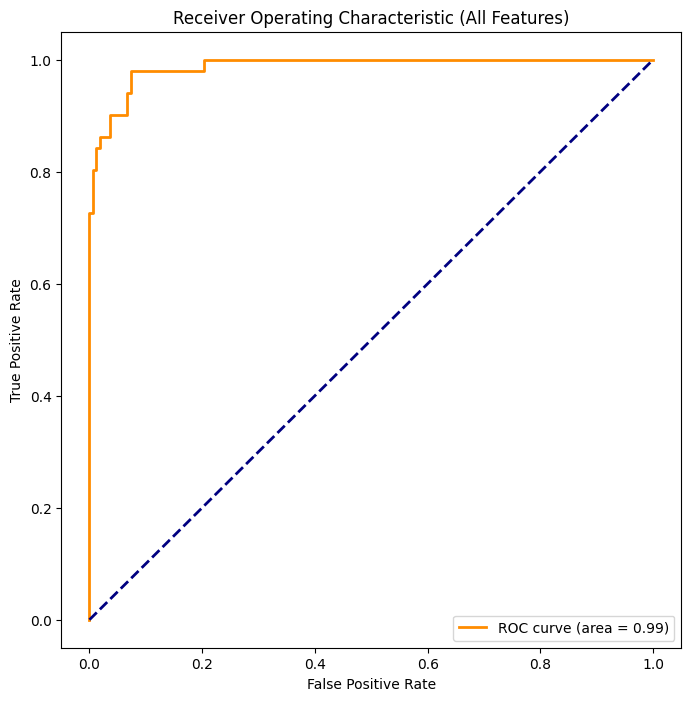

In [63]:
# Separate features (X) and target variable (y)
X = glass.drop('Type', axis=1)
y = glass['Type']

# Convert target variable to binary format
y_binary = np.where(y.isin([5, 6, 7]), 1, 0)

# Normalize the features to ensure they are on a similar scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Now, fit a logistic regression model on all features
logreg_all_features = LogisticRegression()
logreg_all_features.fit(X_normalized, y_binary)

# Make predictions
pred_all_features = logreg_all_features.predict(X_normalized)

# Evaluate the model
accuracy_all_features = accuracy_score(y_binary, pred_all_features)
precision_all_features = precision_score(y_binary, pred_all_features)
recall_all_features = recall_score(y_binary, pred_all_features)

# Print or use these metrics as needed
print("Accuracy (All Features):", accuracy_all_features)
print("Precision (All Features):", precision_all_features)
print("Recall (All Features):", recall_all_features)

# ROC Curve for all features model
fpr_all, tpr_all, thresholds_all = roc_curve(y_binary, logreg_all_features.predict_proba(X_normalized)[:, 1])
roc_auc_all = auc(fpr_all, tpr_all)

plt.figure(figsize=(8, 8))
plt.plot(fpr_all, tpr_all, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_all))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (All Features)')
plt.legend(loc='lower right')
plt.show()

Name
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


C:\Users\28034\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Results for k=2
Inertia: 12.14368828157972
Silhouette Score: 0.6294675561906644


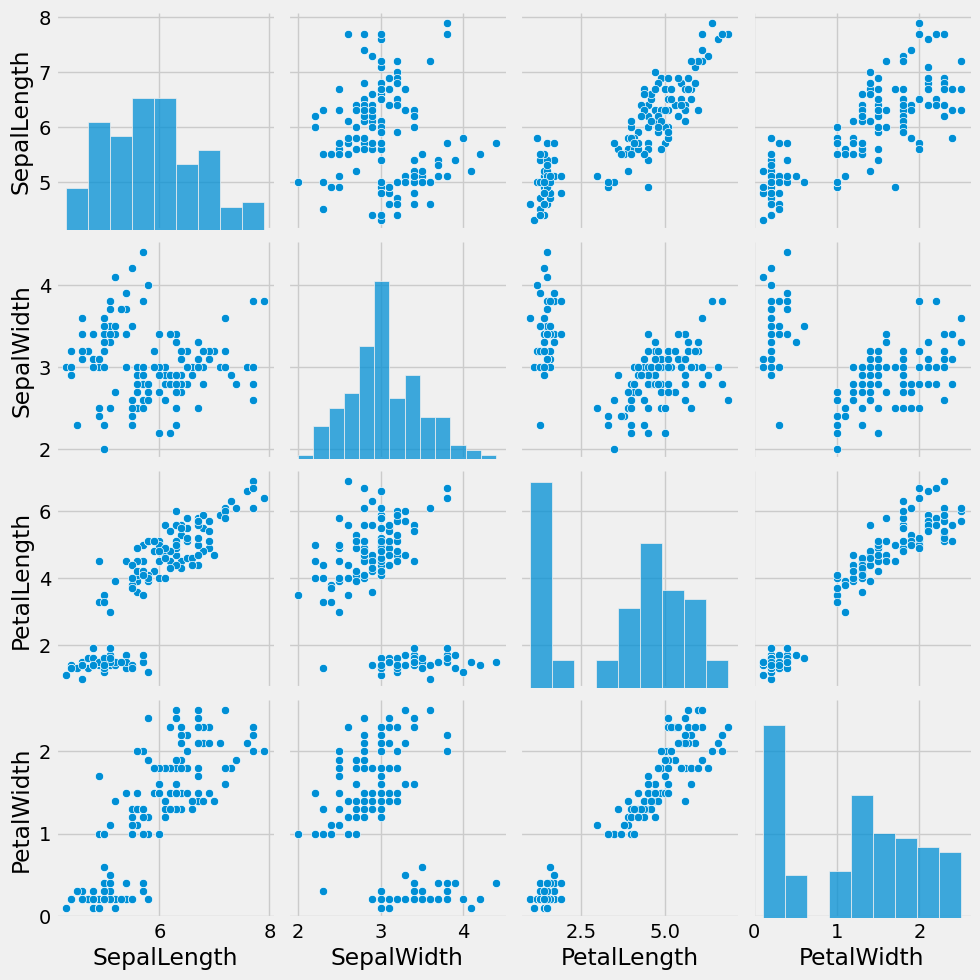

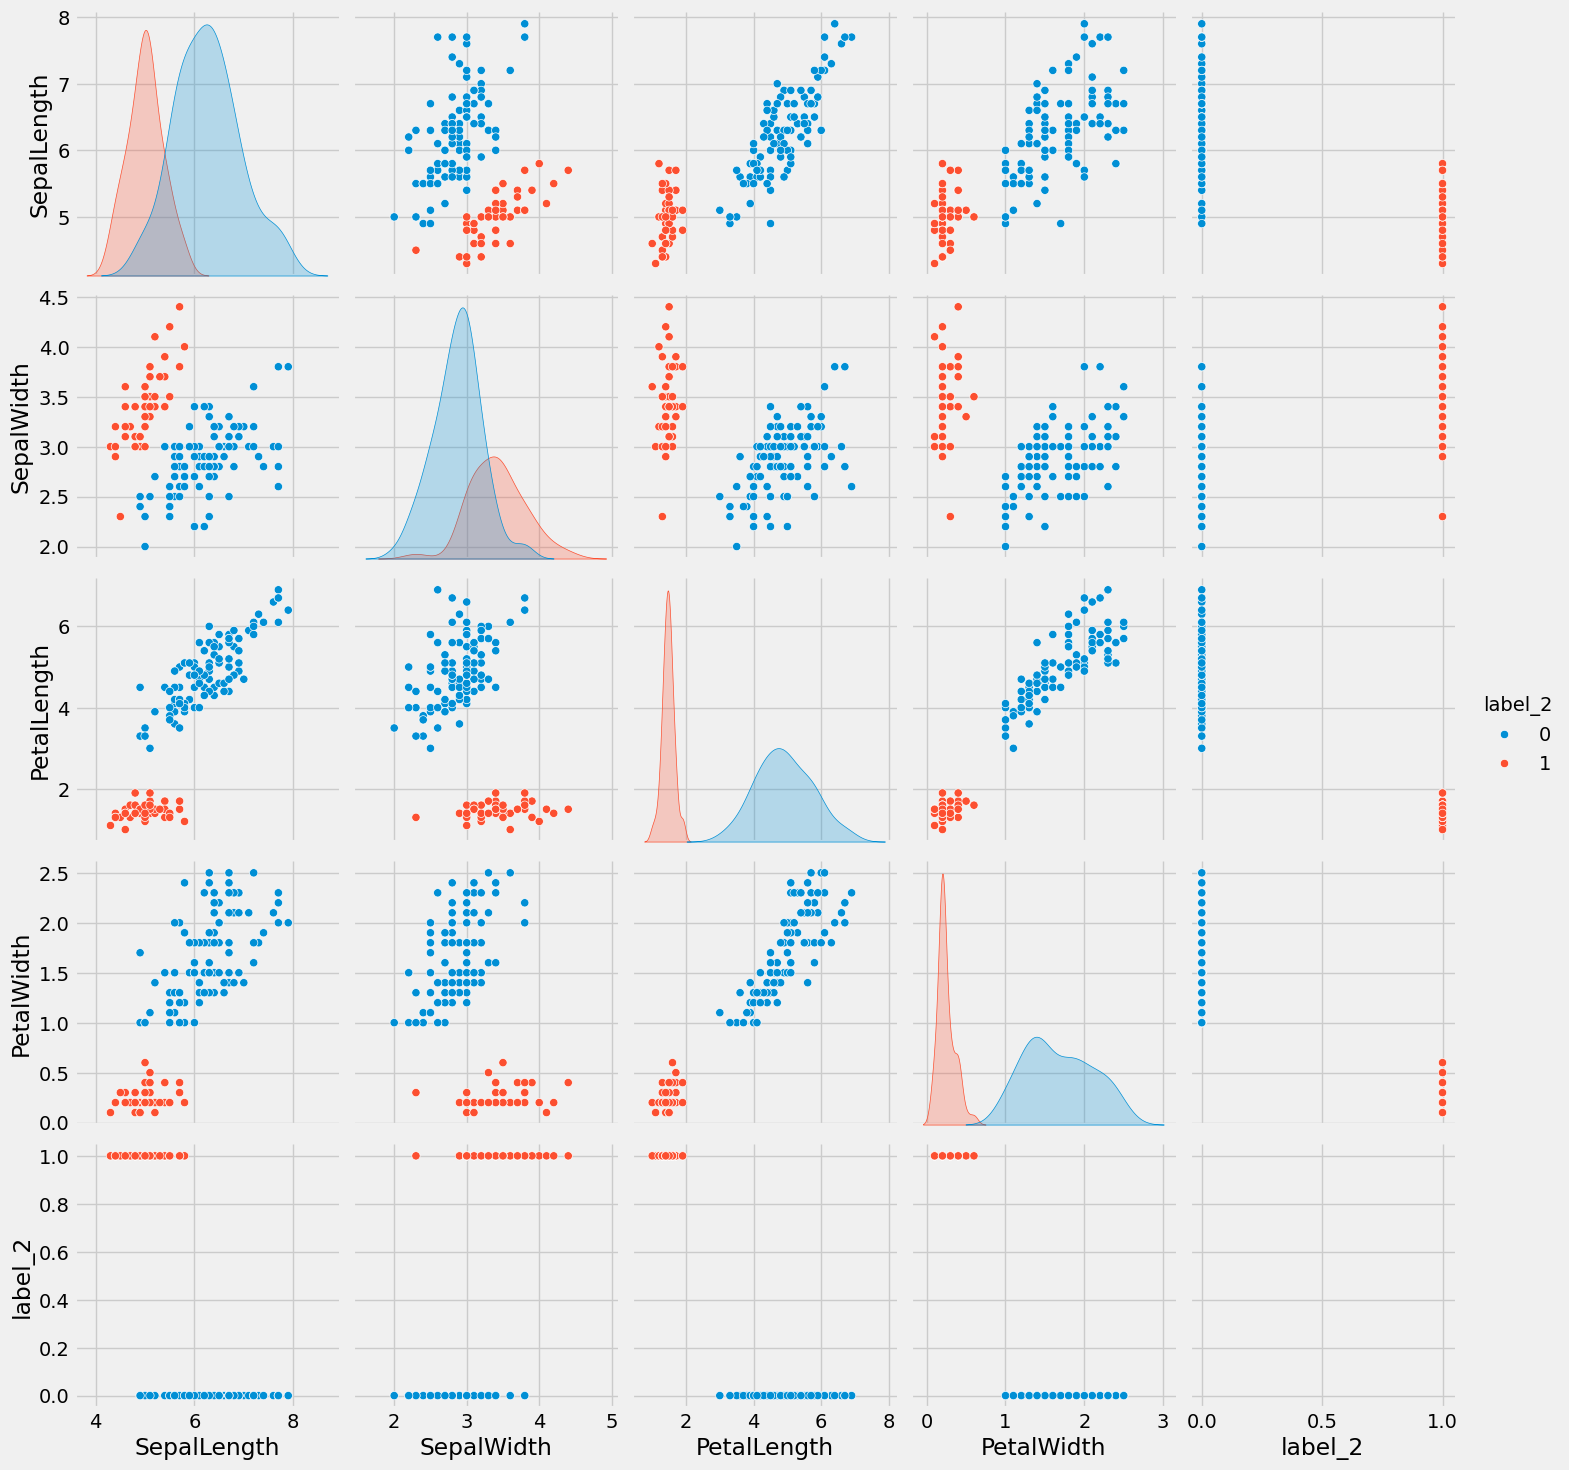

C:\Users\28034\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Results for k=3
Inertia: 6.998114004826762
Silhouette Score: 0.5043188549150884


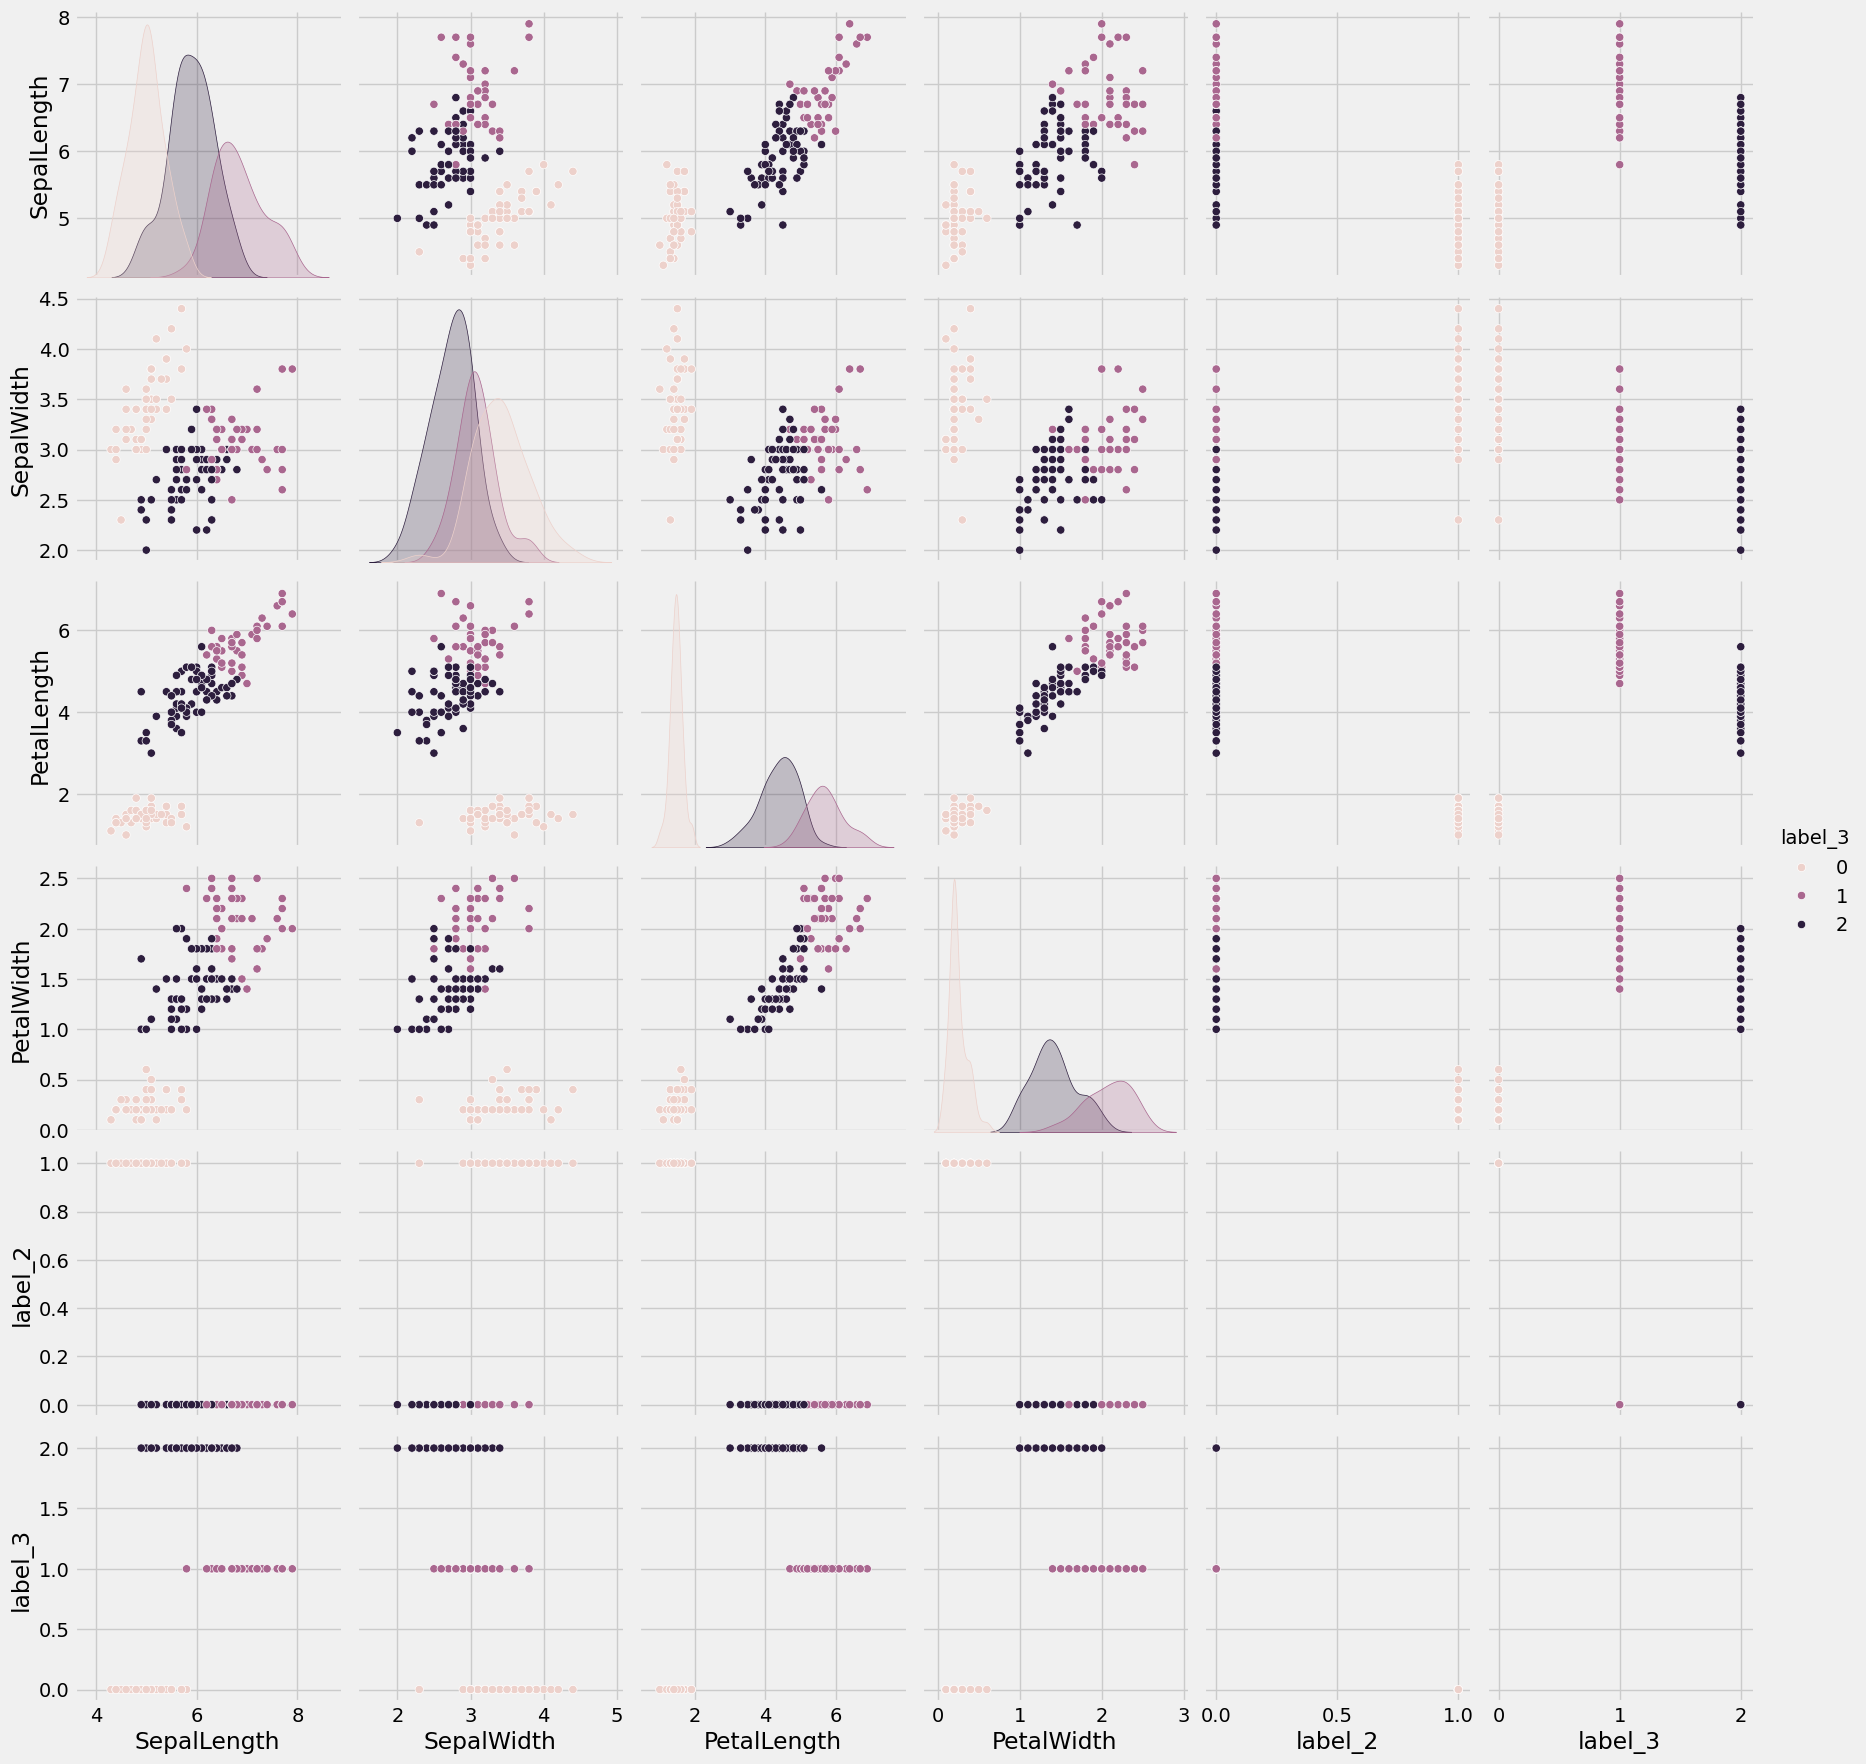

C:\Users\28034\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Results for k=4
Inertia: 5.532831003081897
Silhouette Score: 0.4446273300650682


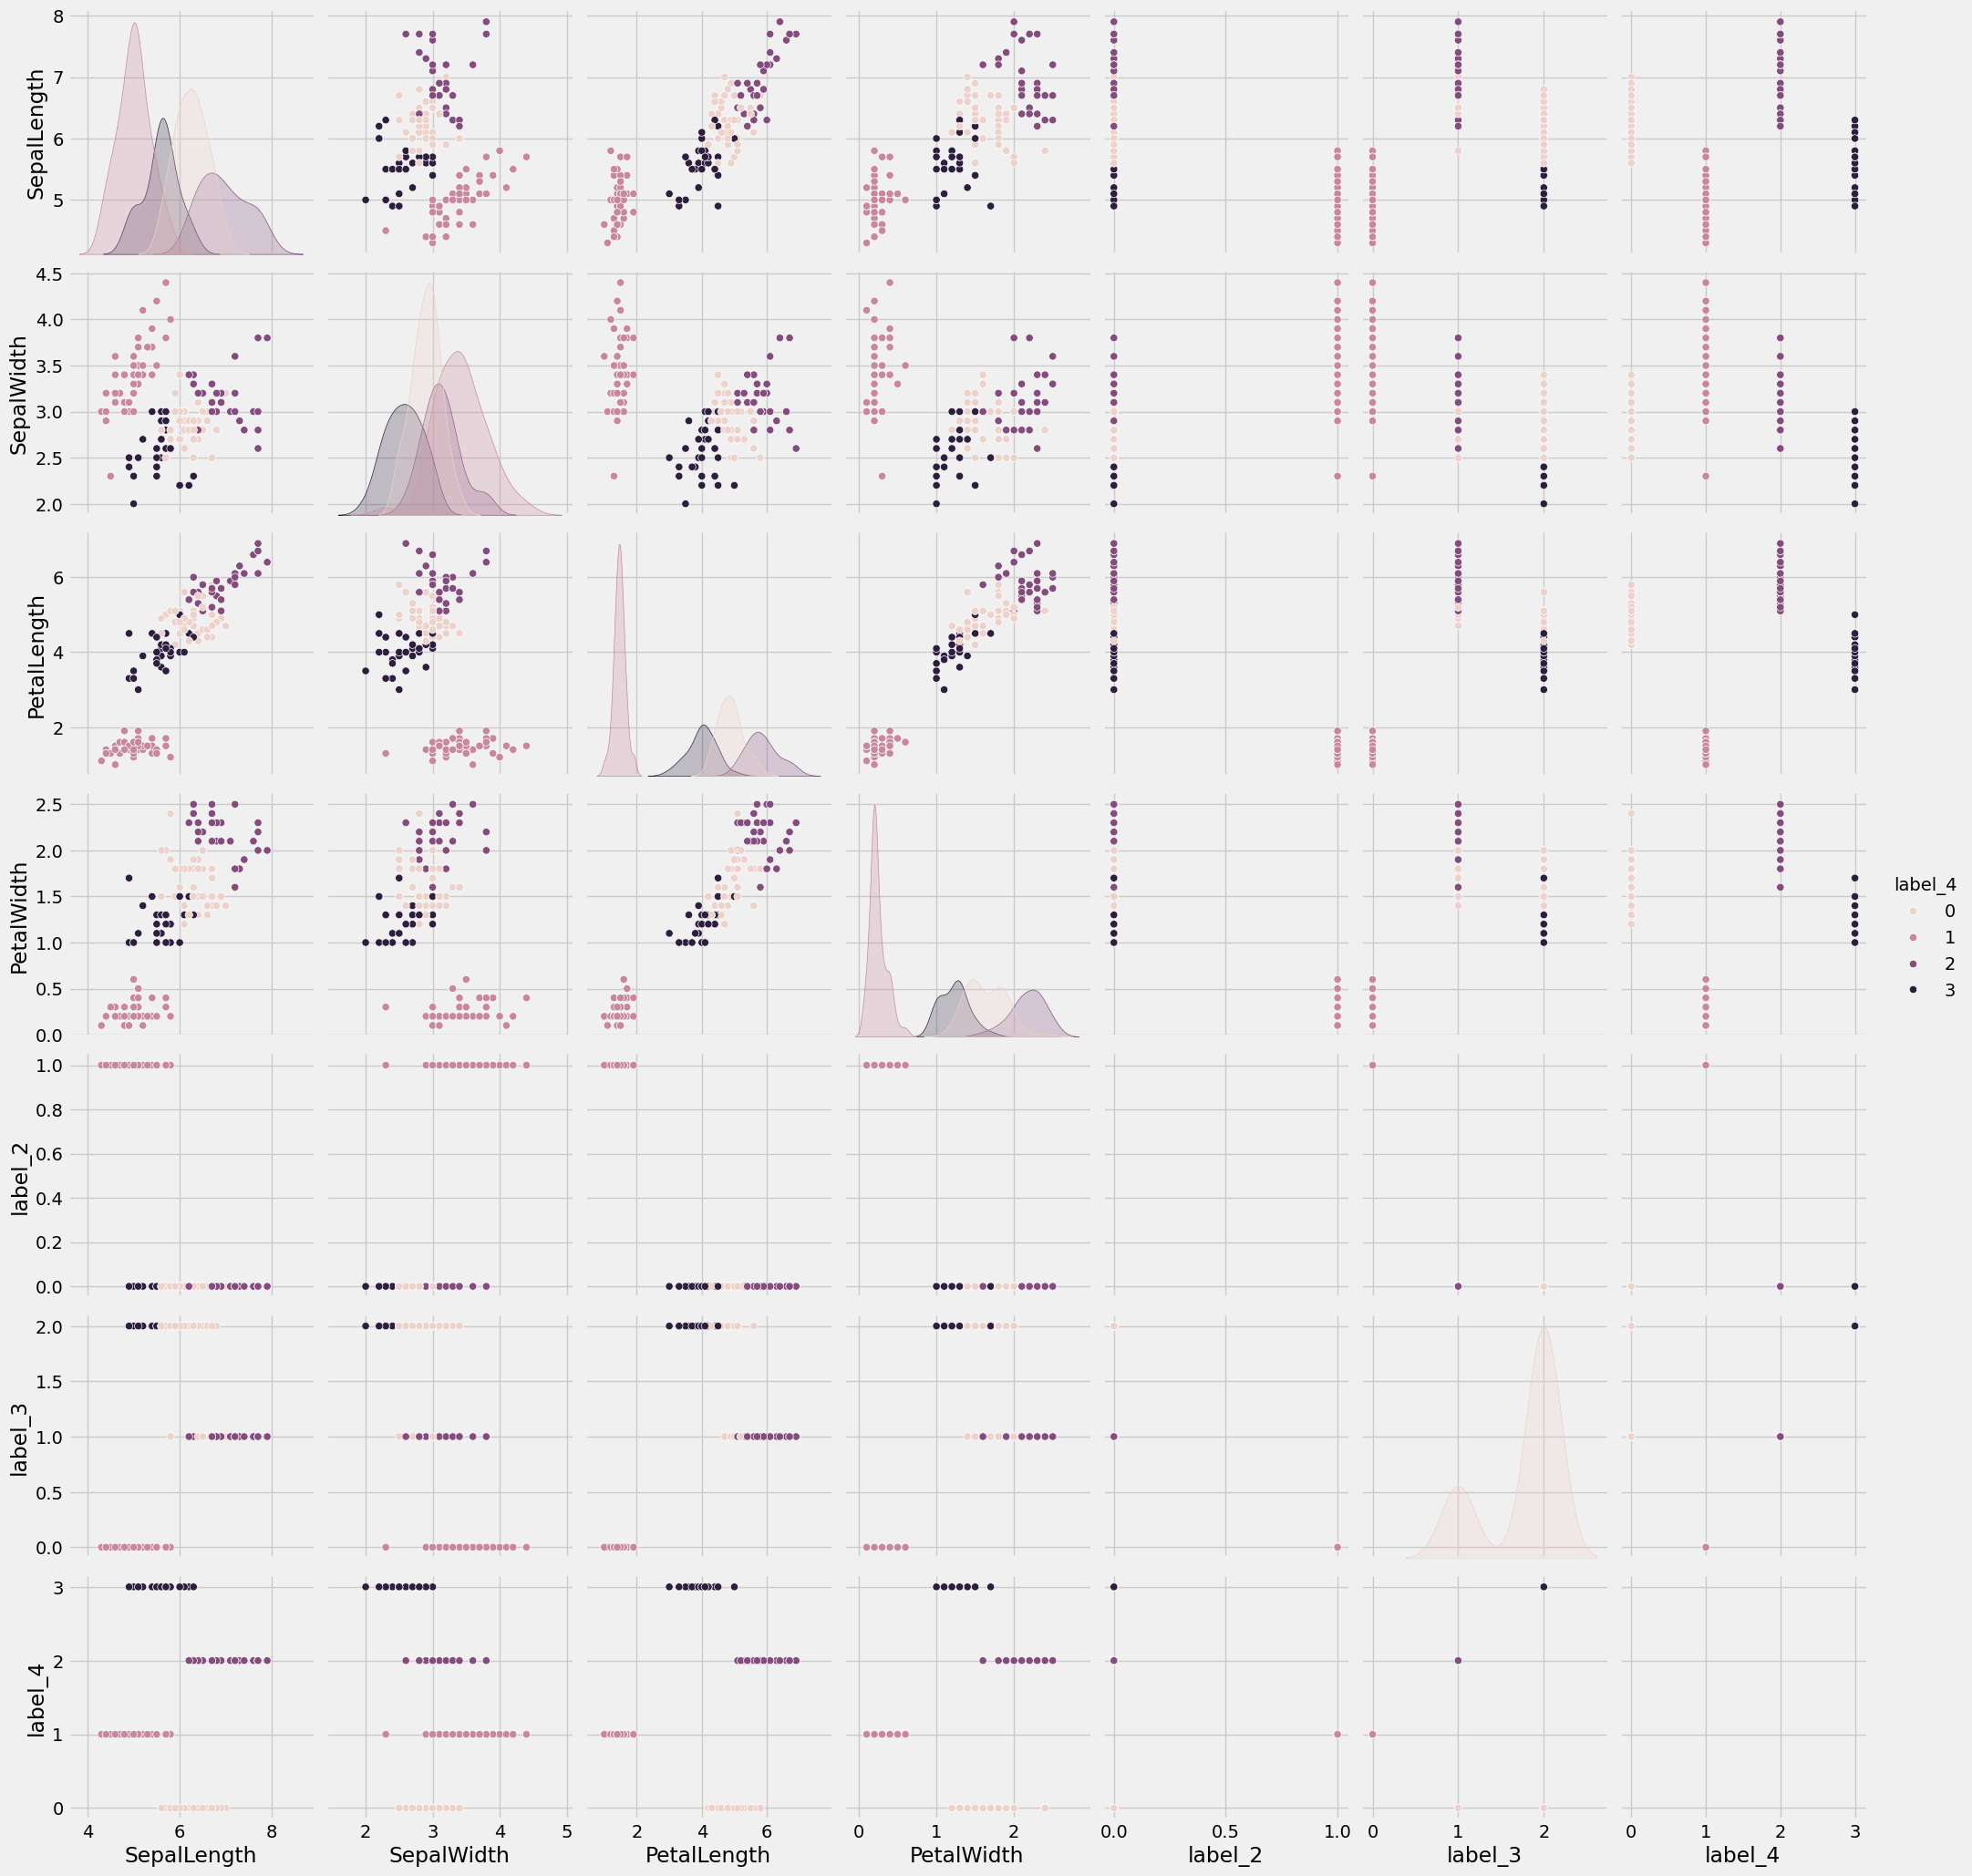

C:\Users\28034\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Results for k=5
Inertia: 4.571211374951953
Silhouette Score: 0.35268997896773463


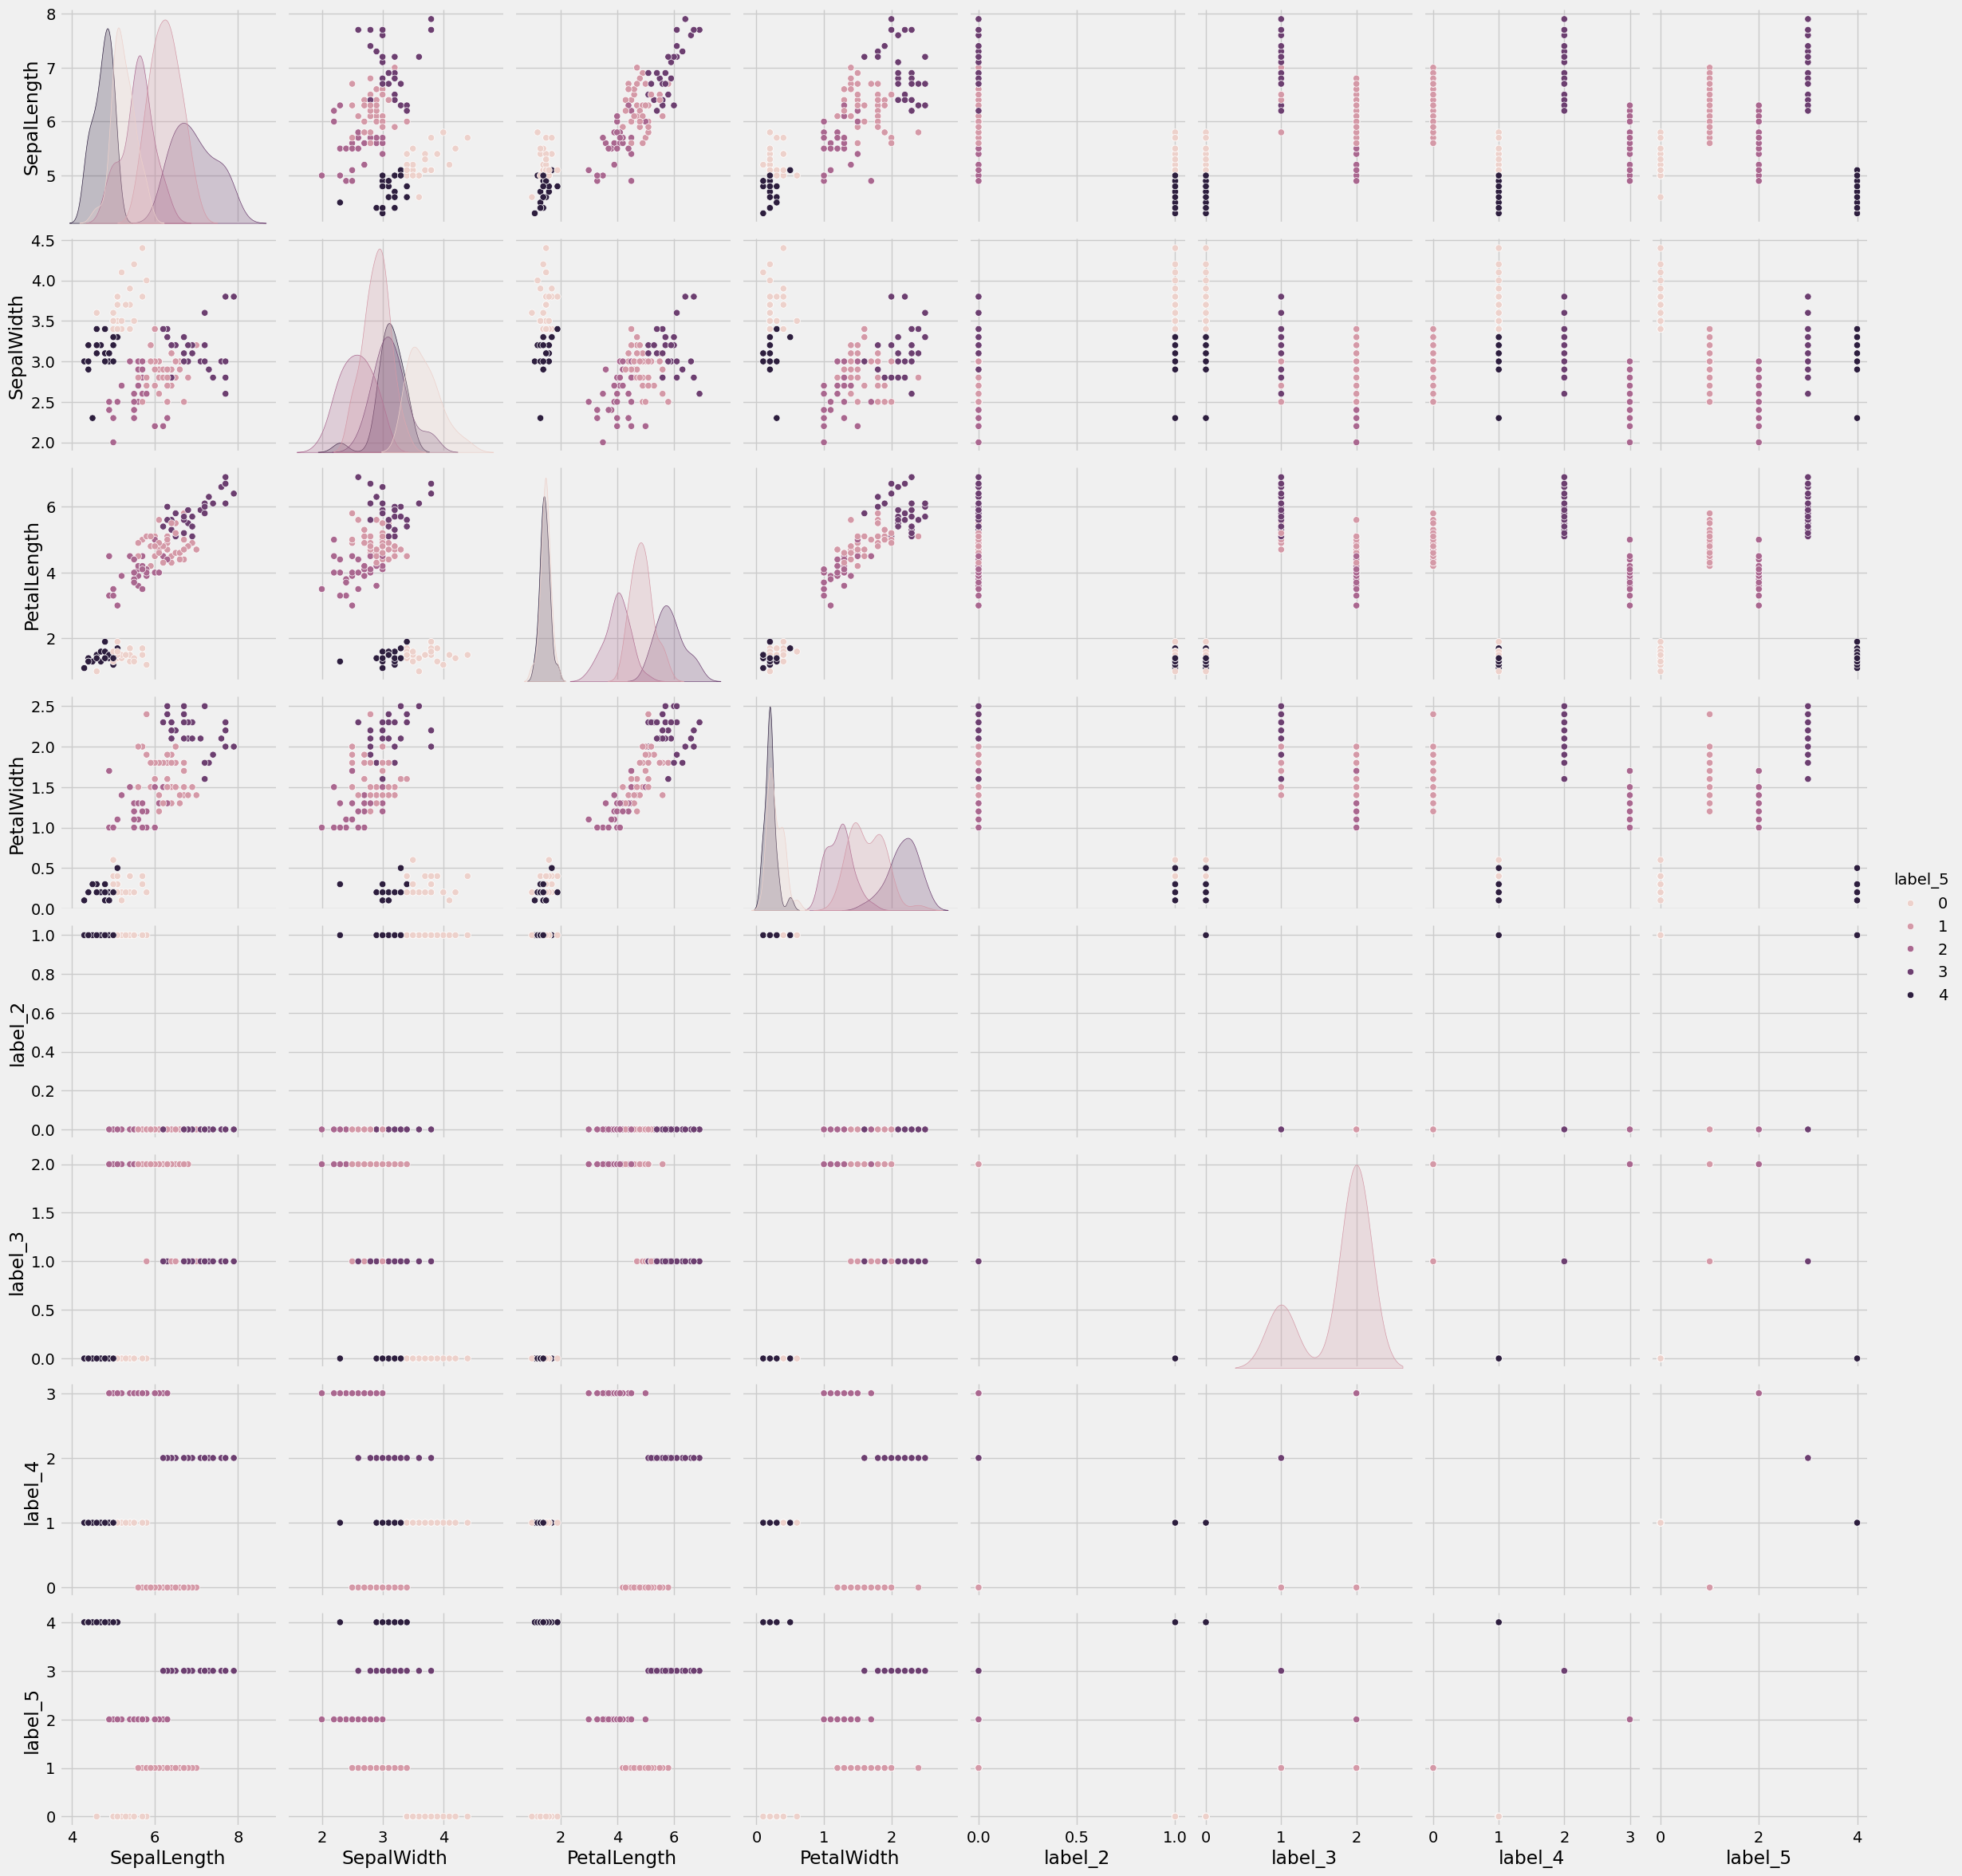

In [69]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets, preprocessing, metrics
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# Check out the dataset and our target values
df = pd.read_csv("iris.csv")
print(df['Name'].value_counts())

cols = df.columns[:-1]
sns.pairplot(df[cols])

X_scaled = preprocessing.MinMaxScaler().fit_transform(df[cols])
pd.DataFrame(X_scaled, columns=cols).describe()

# Try different values of k
for k in range(2, 6):  # Adjust the range as needed
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    inertia = kmeans.inertia_
    silhouette = metrics.silhouette_score(X_scaled, labels, metric='euclidean')

    print(f"\nResults for k={k}")
    print("Inertia:", inertia)
    print("Silhouette Score:", silhouette)

    df[f'label_{k}'] = labels

    # Select only numeric columns for pair plots
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    sns.pairplot(df, x_vars=numeric_cols, y_vars=numeric_cols, hue=f'label_{k}', height=3)
    plt.show()
    plt.show()

1. How do the inertia and silhouette scores change?
Inertia: Inertia measures how far the points within a cluster are from the center of that cluster. Generally, lower inertia is better, indicating tighter clusters. As you increase the number of clusters (k), inertia tends to decrease because there are more cluster centers, and the points are closer to their respective centers. However, it might reach a point where the decrease becomes marginal.

Silhouette Score: Silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. An increase in the number of clusters can lead to a higher silhouette score if the clusters are well-separated and compact.

2. What if you don't scale your features?
Scaling features is crucial for K-means clustering because it is distance-based. If features are on different scales, the algorithm might give more weight to features with larger scales, leading to biased results. By scaling, you ensure that all features contribute equally to the distance computation.

If you don't scale your features, the results might be skewed, and clusters could be dominated by features with larger scales.

3. Is there a 'right' k? Why or why not?
Determining the right number of clusters (k) is often a challenge and depends on the nature of your data. There are several methods to find an optimal k, such as the elbow method (looking for a point where inertia starts to decrease at a slower rate) or silhouette analysis.

However, the "right" k is somewhat subjective and can vary based on the context of your analysis. Choosing too small a k may oversimplify the structure of your data, while choosing too large a k may introduce noise. It's often a balance between interpretability and capturing meaningful patterns in the data.

Exploring various k values and evaluating their impact on both inertia and silhouette scores can help you make an informed decision. Additionally, domain knowledge and the specific goals of your analysis play a crucial role in selecting the appropriate number of clusters.

           Name  Energy  Protein  Fat  Calcium  Iron
0  Braised beef     340       20   28        9   2.6
1     Hamburger     245       21   17        9   2.7
2    Roast beef     420       15   39        7   2.0
3     Beefsteak     375       19   32        9   2.6
4   Canned beef     180       22   10       17   3.7


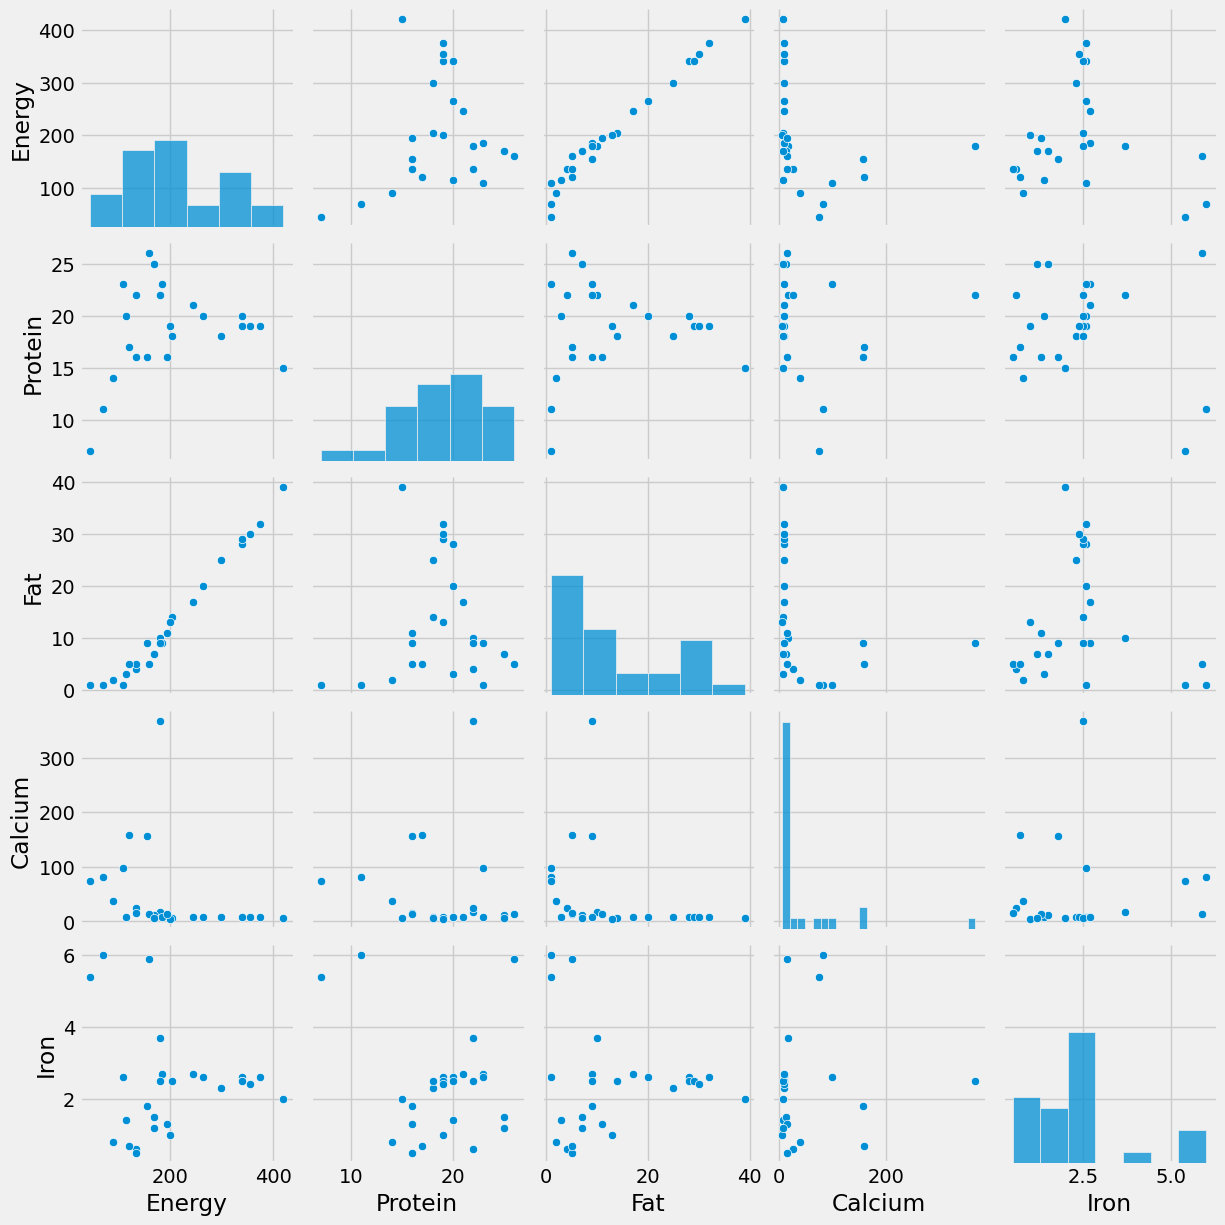

C:\Users\28034\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Results for k=2
Inertia: 5.0693213399294175
Silhouette Score: 0.37853125817495303


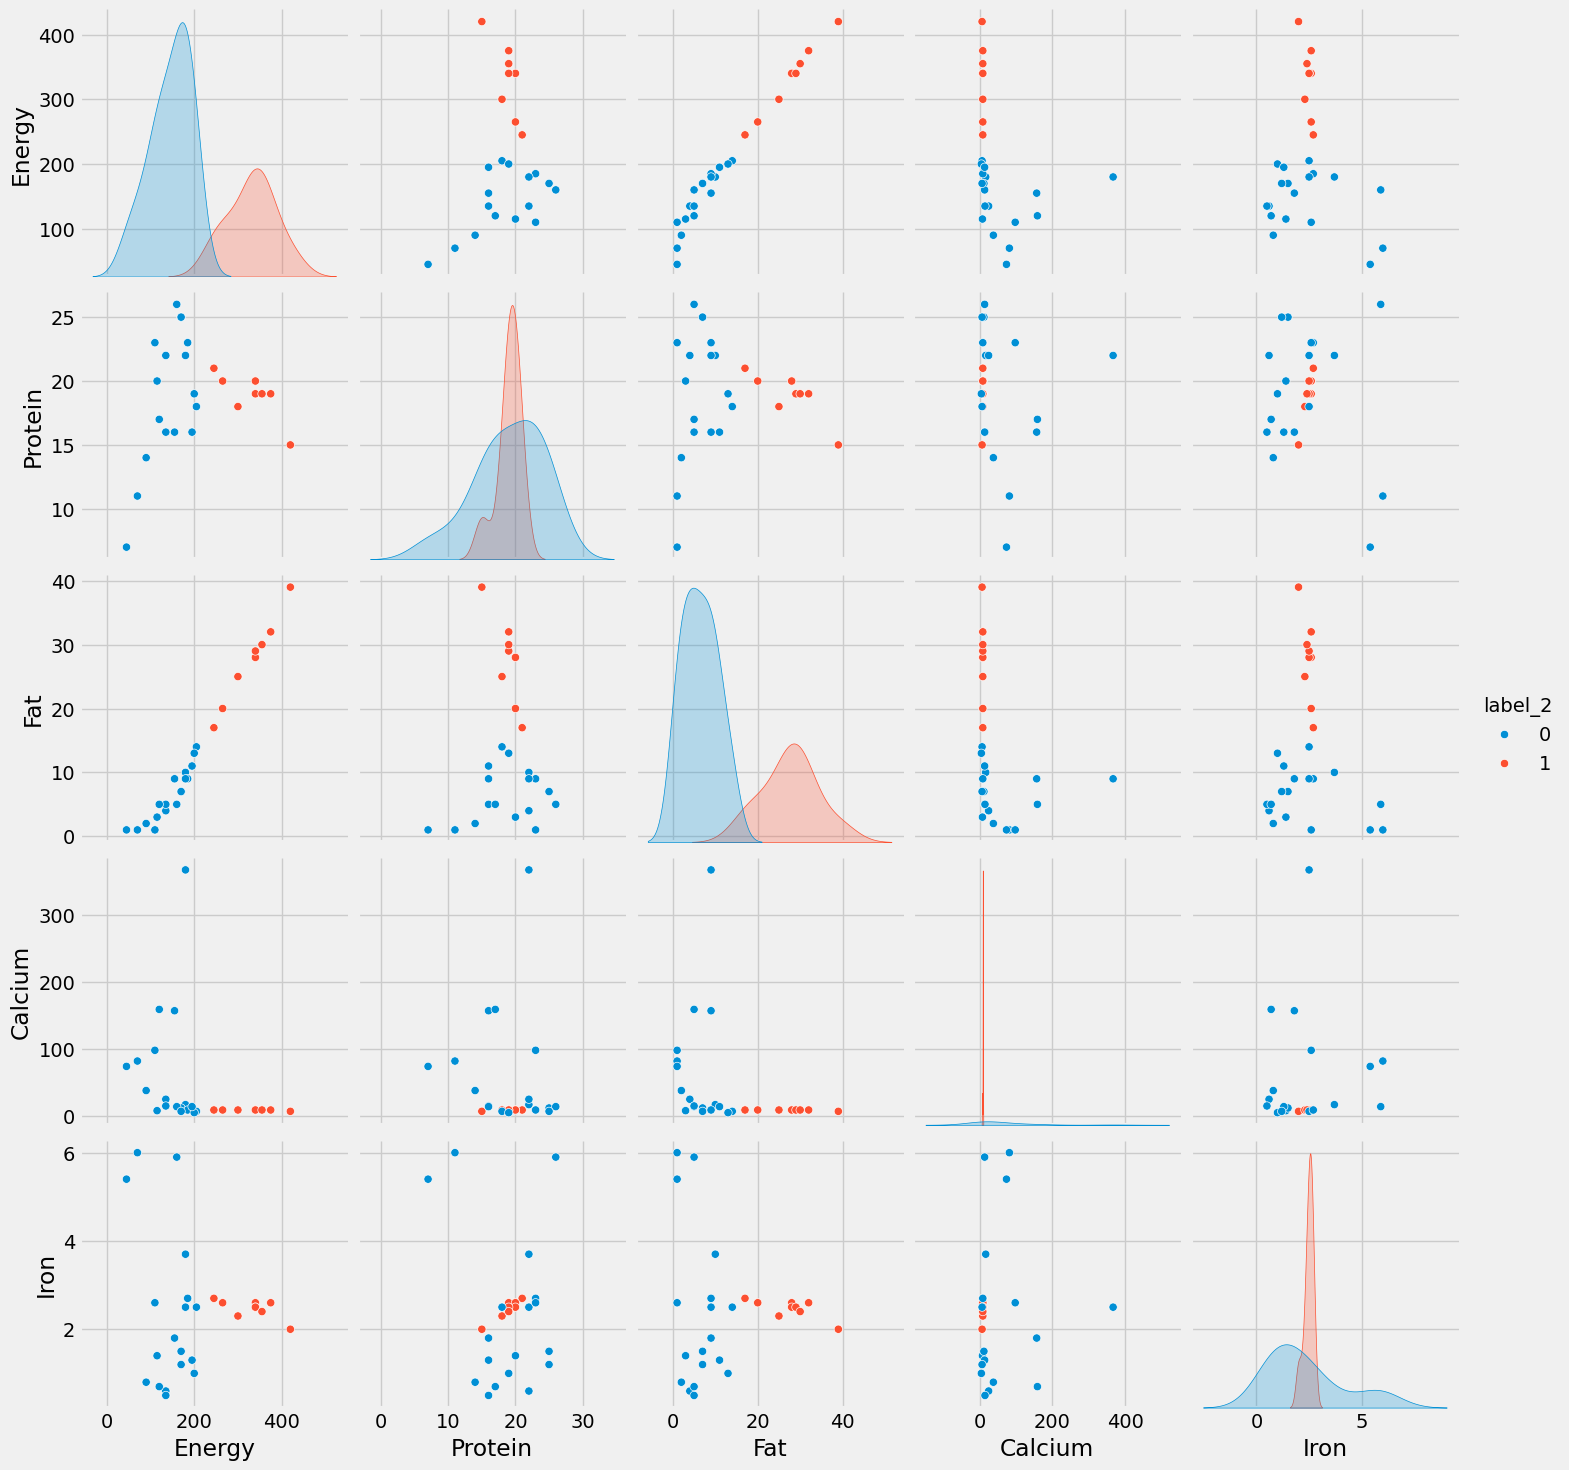

C:\Users\28034\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Results for k=3
Inertia: 3.3666216536145206
Silhouette Score: 0.43310014530591173


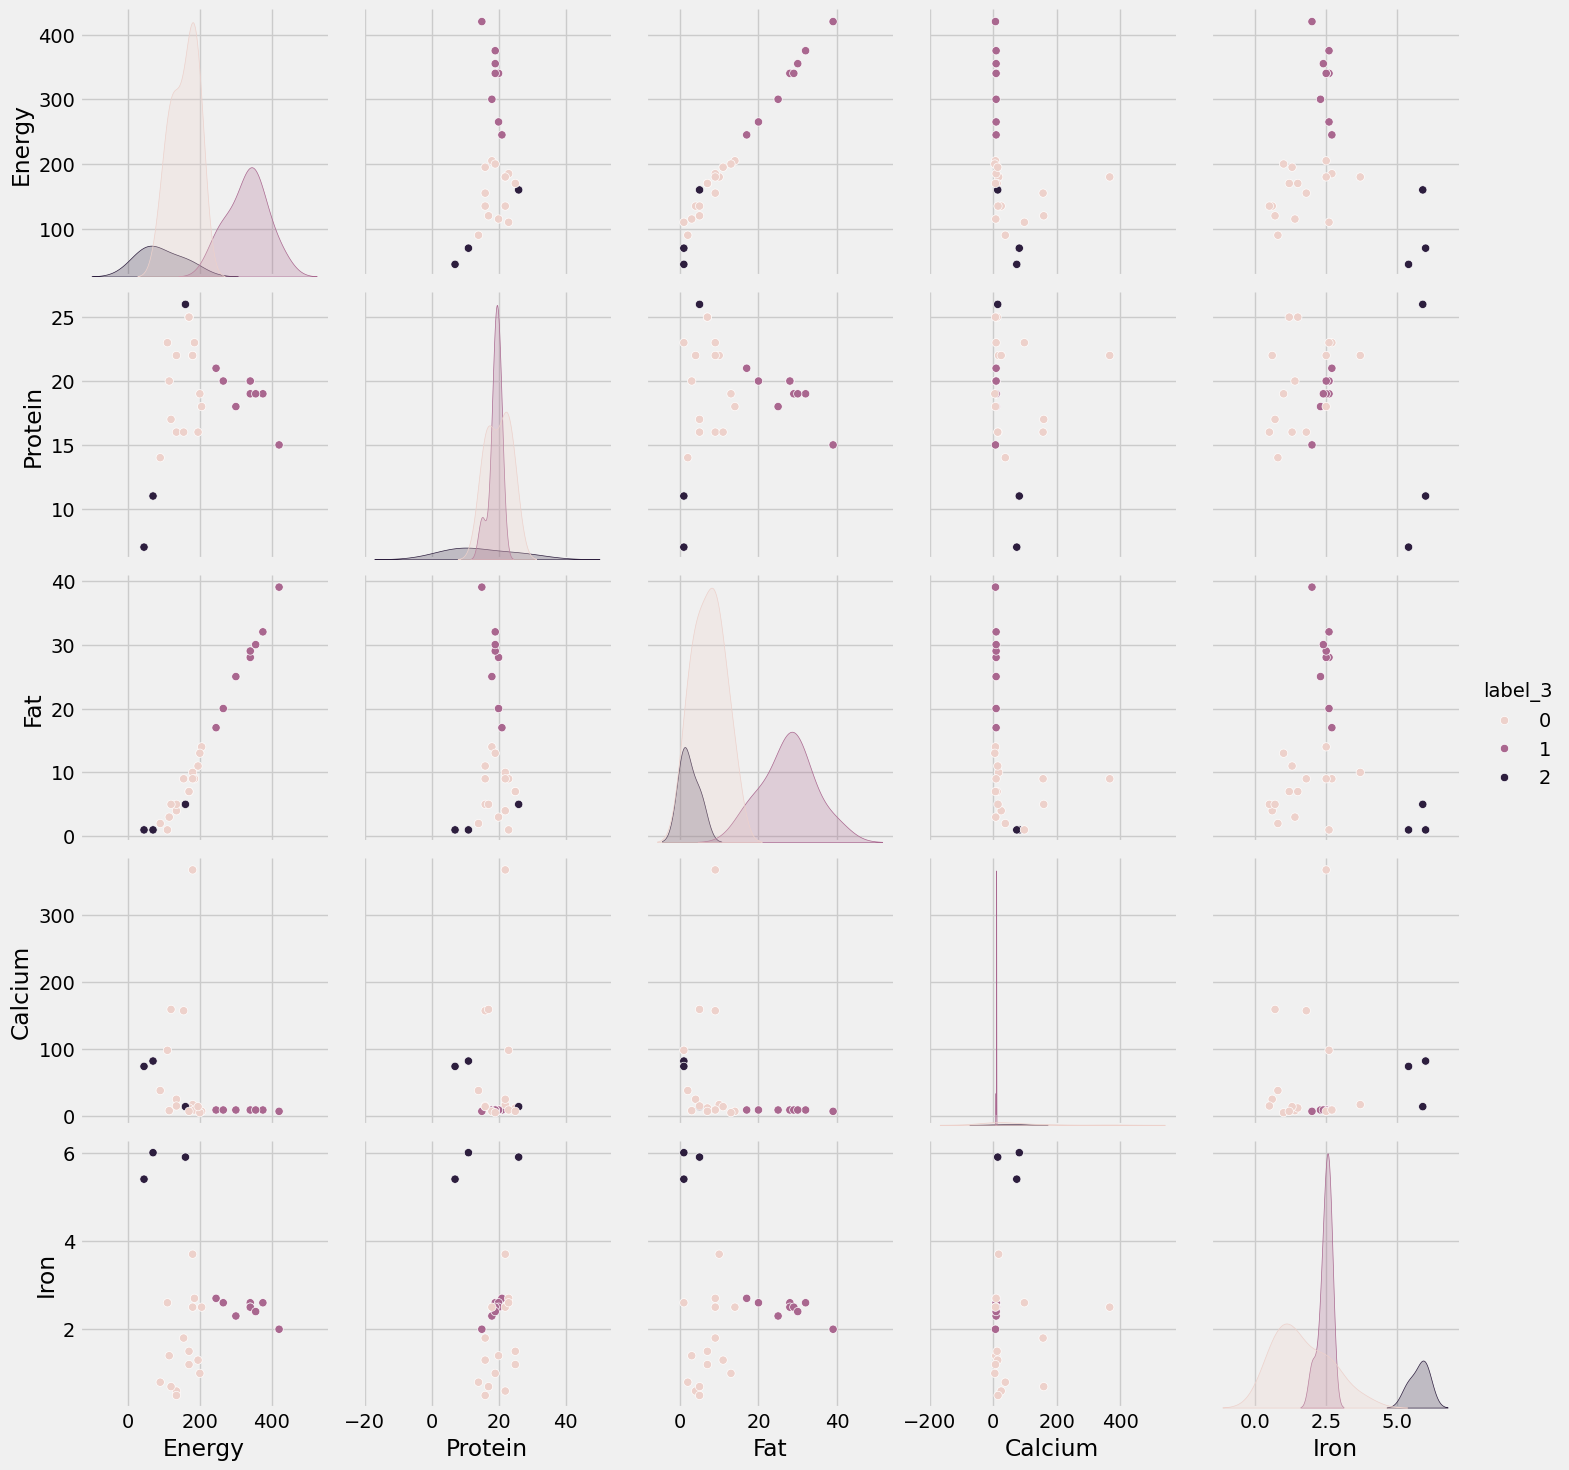

C:\Users\28034\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Results for k=4
Inertia: 2.587015777083336
Silhouette Score: 0.37459751059211954


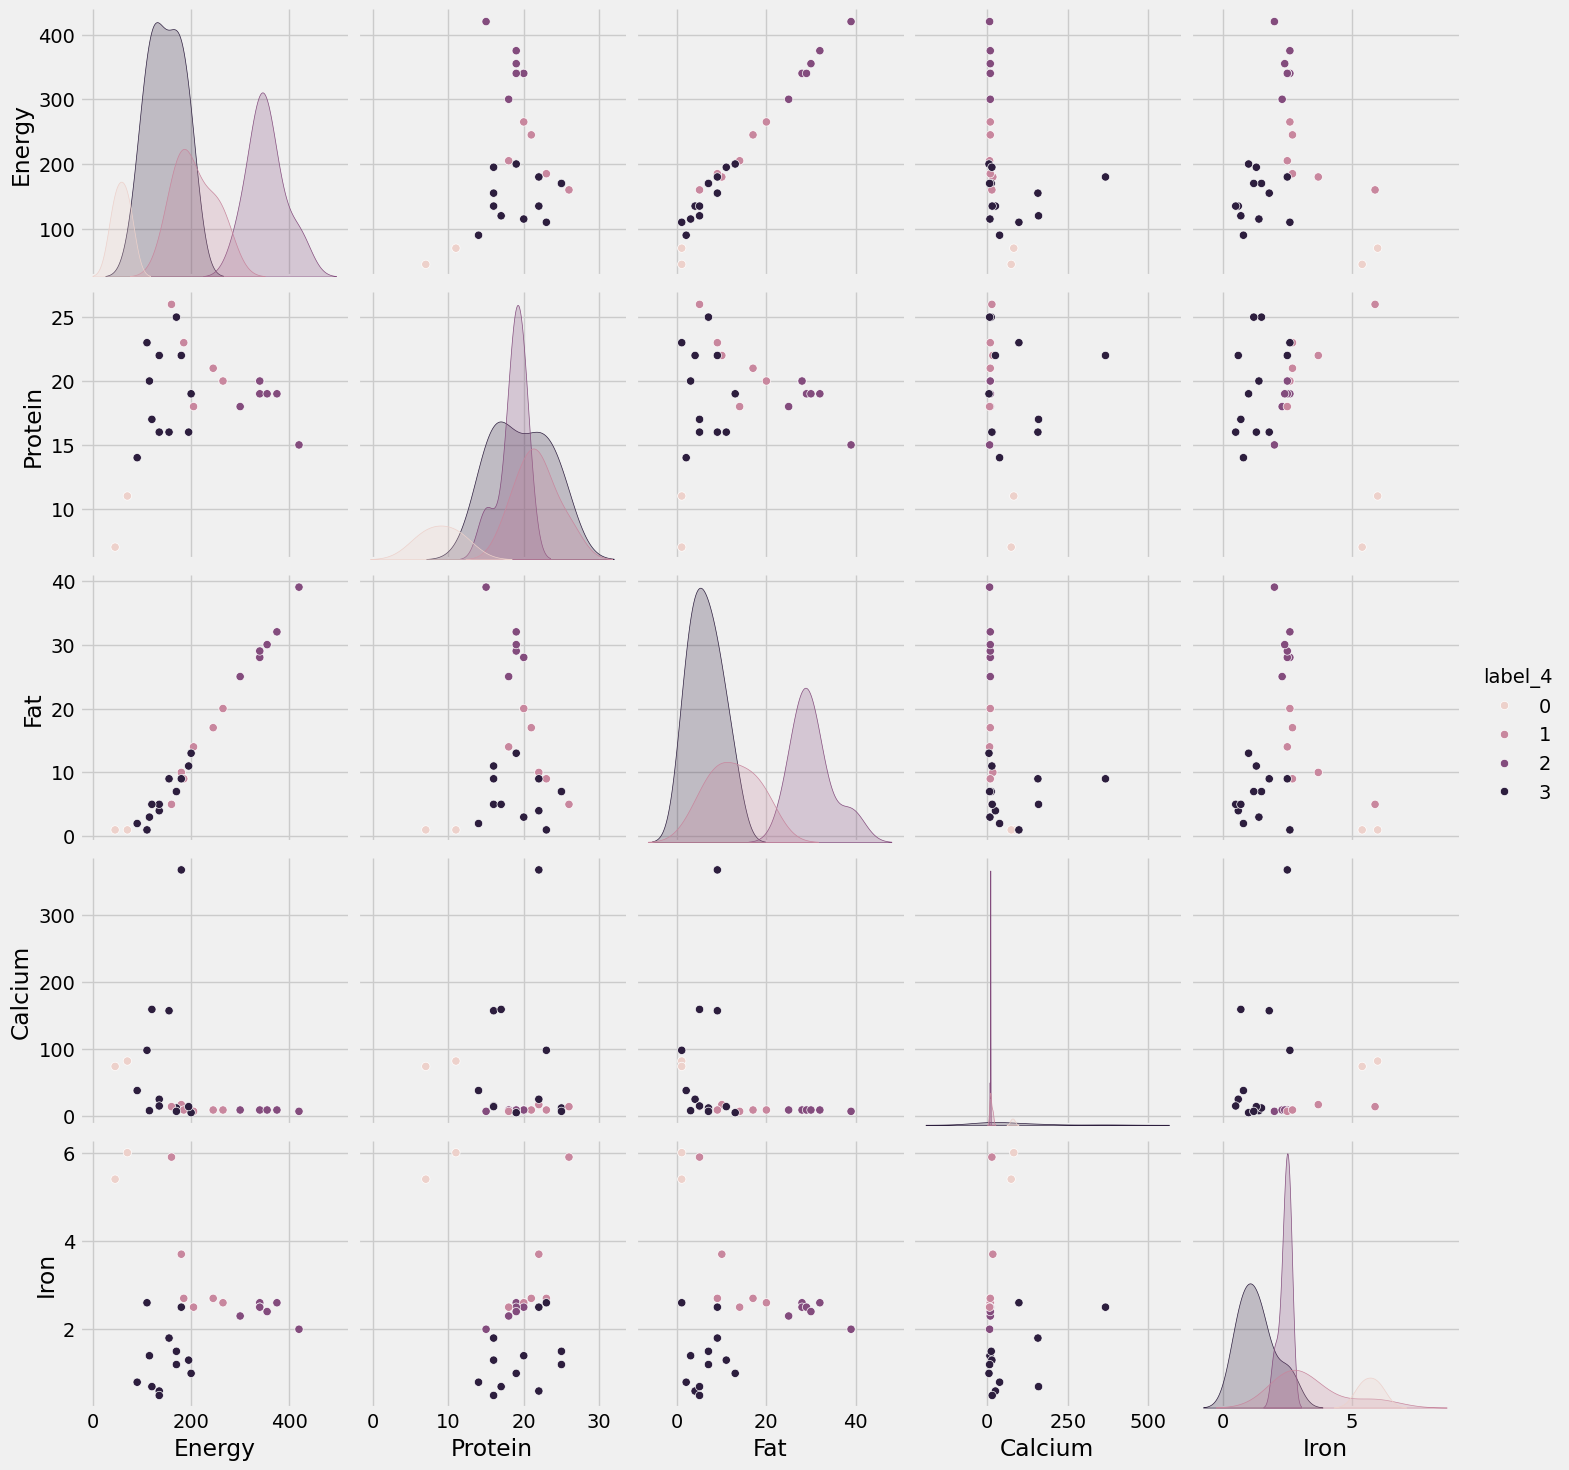

C:\Users\28034\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Results for k=5
Inertia: 1.7762415844992665
Silhouette Score: 0.3945767340933728


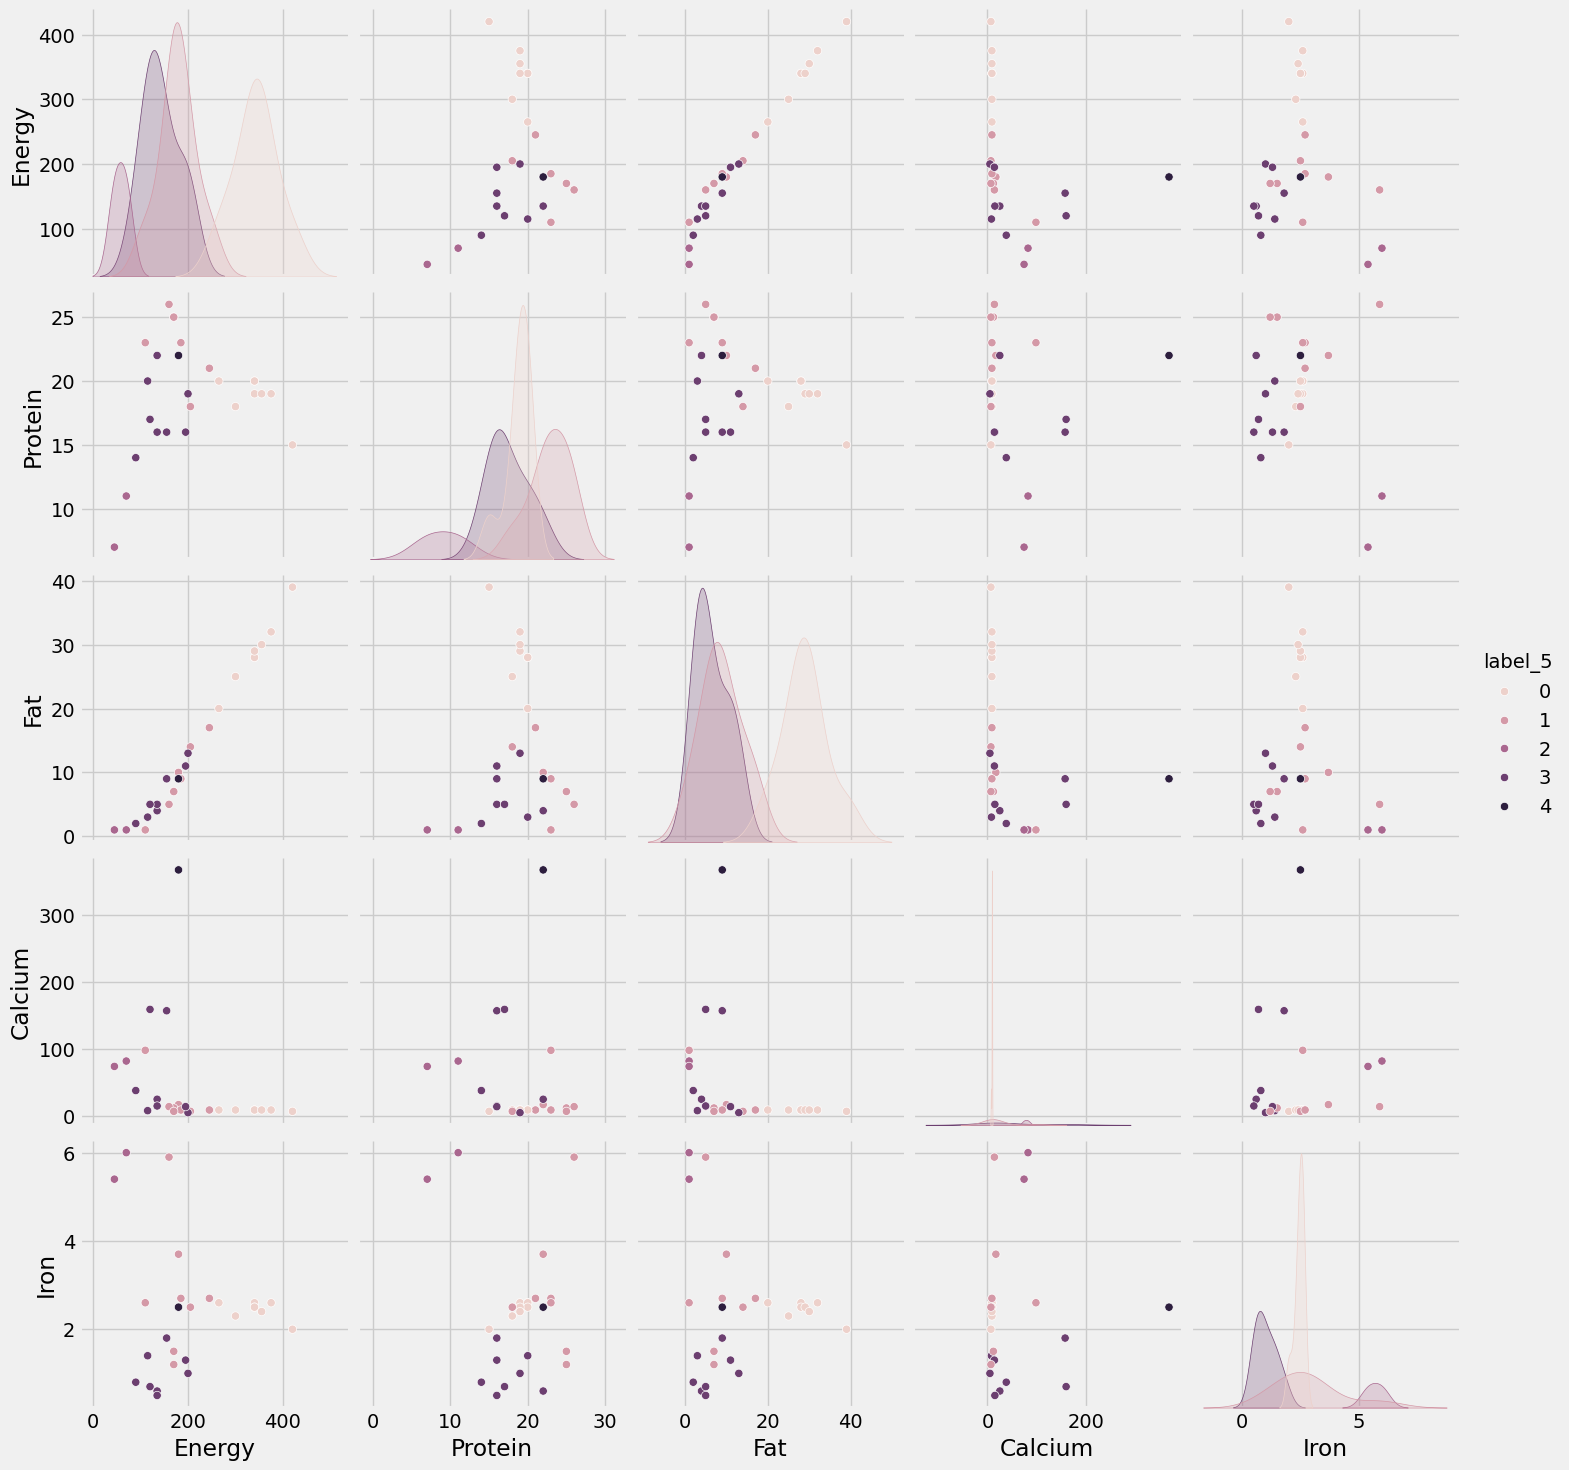

In [79]:
# Read the food nutrients dataset
df_food = pd.read_csv("nutrients.txt", sep='\s+', quotechar='"')

# Check out the dataset
print(df_food.head())

# Selecting numeric columns for pair plots
numeric_cols_food = df_food.select_dtypes(include=[np.number]).columns

# Pair plot for the original data
sns.pairplot(df_food[numeric_cols_food])
plt.show()

# Scale the numeric columns
X_scaled_food = preprocessing.MinMaxScaler().fit_transform(df_food[numeric_cols_food])

# Try different values of k
for k in range(2, 6):  # Adjust the range as needed
    kmeans_food = cluster.KMeans(n_clusters=k)
    kmeans_food.fit(X_scaled_food)
    labels_food = kmeans_food.labels_
    centroids_food = kmeans_food.cluster_centers_
    inertia_food = kmeans_food.inertia_
    silhouette_food = metrics.silhouette_score(X_scaled_food, labels_food, metric='euclidean')

    print(f"\nResults for k={k}")
    print("Inertia:", inertia_food)
    print("Silhouette Score:", silhouette_food)

    df_food[f'label_{k}'] = labels_food

    # Pair plot for the clustered data
    sns.pairplot(df_food, x_vars=numeric_cols_food, y_vars=numeric_cols_food, hue=f'label_{k}', height=3)
    plt.show()